#Trabajo Data Science CoderHouse

#Sección 1:Presentación del problema específico

##Contexto:Análisis del covid-19

¿Por qué es importante investigar sobre esta temática?

La razón por la cual me intereso realizar un análisis respecto a los casos de COVID-19 que han ocurrido en todo el mundo, es para poder entender el impacto que causo en todos los países del mundo. El mismo,ha demostrado ser un evento sin precedentes que ha afectado a casi todos los aspectos de la sociedad global.


Algunas de las variables donde se pudo ver reflejada su incidencia fueron y son:


*   Salud pública y atención médica

Examinar la propagación de los casos de  COVID-19 en diferentes regiones y países proporcionó información valiosa sobre cómo se ha comportado el virus y cómo ha impactado en términos de carga de enfermedad, hospitalizaciones y mortalidad. Esto es esencial para mejorar la respuesta en salud pública y planificar adecuadamente los recursos médicos en situaciones similares en el futuro.

*   Lecciones para futuras pandemias

El análisis detallado de cómo los gobiernos, organizaciones de salud y comunidades han abordado la pandemia proporciona conocimientos valiosos para futuras crisis sanitarias. Comprender qué estrategias funcionaron y cuáles no, cómo se comunicaron los riesgos y cómo se tomaron decisiones puede ayudar a prepararse mejor para enfrentar situaciones similares.

*   Impacto socioeconómico

El COVID-19 ha tenido un impacto significativo en la economía global, con cierres de negocios, pérdida de empleos y recesiones en muchas partes del mundo. El análisis de estos efectos económicos puede informar las políticas gubernamentales y las estrategias de recuperación para mitigar los daños en futuras crisis.

*   Desigualdades y vulnerabilidades

La pandemia ha resaltado y ampliado las desigualdades existentes en la sociedad. El análisis de cómo diferentes grupos demográficos se vieron afectados de manera desproporcionada puede llevar a una mayor conciencia sobre estas disparidades y fomentar acciones para abordarlas.

*   Avances científicos y médicos

La investigación sobre el virus y la enfermedad ha avanzado significativamente en poco tiempo. Analizar cómo se ha compartido el conocimiento científico, cómo se han desarrollado vacunas y tratamientos, y cómo se ha comunicado esta información puede informar sobre cómo acelerar la respuesta científica en el futuro.

##Audiencia
Este análisis intenta contestar, con evidencia, algunas preguntas que tienen relación con las variables anteriormente mencionadas. Estas respuestas ayudarán a entender el virus en la sociedad

#Sección 2: Preguntas de interés

El dataset trabajado, es acerca de la problematica mundial ocurrida a principios de Marzo del 2020, "Covid-19". La idea de este trabajo es poder dar respuesta, a diferentes preguntas que fueron surgiendo a lo largo del entendimiento y visualización de la información disponible. Las preguntas que se van a intentar responder con distintas visualizaciones y calculos son:


*  ¿Cuales son los 5 países principales en los cuales hubieron más cantidad de muertes?
*   Segun la cantidad de casos de Covid, cuantos finalizaron en muertes y cuantos se recuperaron?
*  De los casos activos actualmente, cuantos terminaron en muertes y cuantos se recuperaron?
*  ¿Cuales son los 5 países principales en los cuales hay mas casos activos?
* ¿Cuáles son los 5 países principales en los cuales, hay más casos recuperados?
Además, agregaré otro dataset, que tendrá información considerada relevante para este analisis. El mismo, posee la cantidad de vacunaciones por país.

##Objetivo

Se genererá un modelo que seleccione las caracteristicas más relevantes con el fin de poder predecir **la cantidad de nuevos casos de covid.**


#Sección 3: Data adquisition

###Importación de librerias

In [ ]:
!pip install missingno

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error,  make_scorer, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from numpy import mean
from numpy import std
import xgboost as xg


##Lectura de archivos


In [2]:
df_covid=pd.read_csv('/content/country_wise_latest.csv',sep=';')
df_covid.head()

,iso_code,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,AFG,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,ALB,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,ALG,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,AND,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,ANG,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [3]:
df_covid = df_covid.rename(columns={'Country/Region': 'Country'})
df_covid.head()

,iso_code,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,AFG,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,ALB,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,ALG,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,AND,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,ANG,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [4]:
df_vacunation=pd.read_csv('/content/vaccinations.csv',sep=',')
df_vacunation.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003


##Exploracion  de los datasets

*Visualizamos las dimensiones de los dataset*

---



In [ ]:
df_covid.shape

(187, 16)

El dataset principal, posee 187 filas y 16 columnas

In [ ]:
df_vacunation.shape

(174234, 16)

El dataset de vacunaciones posee: 174234 filas y 16 columnas

*Visualizamos los tipos de variable de cada uno de los dataset *

---



In [ ]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   iso_code                187 non-null    object 
 1   Country                 187 non-null    object 
 2   Confirmed               187 non-null    int64  
 3   Deaths                  187 non-null    int64  
 4   Recovered               187 non-null    int64  
 5   Active                  187 non-null    int64  
 6   New cases               187 non-null    int64  
 7   New deaths              187 non-null    int64  
 8   New recovered           187 non-null    int64  
 9   Deaths / 100 Cases      187 non-null    float64
 10  Recovered / 100 Cases   187 non-null    float64
 11  Deaths / 100 Recovered  187 non-null    float64
 12  Confirmed last week     187 non-null    int64  
 13  1 week change           187 non-null    int64  
 14  1 week % increase       187 non-null    fl

Descripción de las variables:
 * iso_code: Codigo del país       
 * Country : País               
 * Confirmed: Casos confirmados de covid             
 * Deaths: Muertes                 
 * Recovered: Recuperados               
 * Active: Casos de covid activos =  (total cases) - (total deaths) - (recovered)                
 * New cases: Nuevos casos de covid             
 * New deaths: Nuevas muertes               
 * New recovered: Nuevos recuperados          
 * Deaths / 100 Cases: Muertos cada cien casos      
 * Recovered / 100 Cases: Recuperados cada cien casos
 * Deaths / 100 Recovered: Muertos cada cien casos
 *  Confirmed last week: confirmados la ultima semana     
 * 1 week change: Variación de una semana       
 * 1 week % increase: % de incremento de la semana
 * WHO Region: Continente

In [ ]:
df_vacunation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174234 entries, 0 to 174233
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   location                             174234 non-null  object 
 1   iso_code                             174234 non-null  object 
 2   date                                 174234 non-null  object 
 3   total_vaccinations                   76588 non-null   float64
 4   people_vaccinated                    73341 non-null   float64
 5   people_fully_vaccinated              69866 non-null   float64
 6   total_boosters                       45062 non-null   float64
 7   daily_vaccinations_raw               63042 non-null   float64
 8   daily_vaccinations                   172904 non-null  float64
 9   total_vaccinations_per_hundred       76588 non-null   float64
 10  people_vaccinated_per_hundred        73341 non-null   float64
 11  people_fully_

Descripción de las variables:
 * iso_code: Codigo del país       
 * Location : País
 * Date: fecha
 * total_vaccination: total de vacunados
 * people_vaccinated: personas vacunadas
 * people_fully_vaccinated: personas totalmente vacunadas

**Borrado de duplicados**

---



In [ ]:
print(df_covid.shape)
df_covid=df_covid.drop_duplicates()
print(df_covid.shape)

(187, 16)
(187, 16)


In [ ]:
print(df_vacunation.shape)
df_vacunation=df_vacunation.drop_duplicates()
print(df_vacunation.shape)


(174234, 16)
(174234, 16)


#Sección 4: Data Wrangling

###Analisis de nulos

In [ ]:
# Calcula el número de valores nulos por columna
null_counts = df_covid.isnull().sum()

# Calcula el porcentaje de valores nulos por columna
total_rows = df_covid.shape[0]
null_percentage = (null_counts / total_rows) * 100

# Resultados
null_df = pd.DataFrame({'Columna': null_counts.index, 'Valores Nulos': null_counts.values, 'Porcentaje Nulo': null_percentage.values})

print(null_df)


                   Columna  Valores Nulos  Porcentaje Nulo
0                 iso_code              0              0.0
1                  Country              0              0.0
2                Confirmed              0              0.0
3                   Deaths              0              0.0
4                Recovered              0              0.0
5                   Active              0              0.0
6                New cases              0              0.0
7               New deaths              0              0.0
8            New recovered              0              0.0
9       Deaths / 100 Cases              0              0.0
10   Recovered / 100 Cases              0              0.0
11  Deaths / 100 Recovered              0              0.0
12     Confirmed last week              0              0.0
13           1 week change              0              0.0
14       1 week % increase              0              0.0
15              WHO Region              0              0

Como se mencionó anteriormente, el dataframe df_covid no posee valores nulos, por lo que no resulta interesante seguir investigando sobre esto.

In [ ]:
# Calcula el número de valores nulos por columna
null_counts = df_vacunation.isnull().sum()

# Calcula el porcentaje de valores nulos por columna
total_rows = df_vacunation.shape[0]
null_percentage = (null_counts / total_rows) * 100

# Resultados
null_df_vac = pd.DataFrame({'Columna': null_counts.index, 'Valores Nulos': null_counts.values, 'Porcentaje Nulo': null_percentage.values})

print(null_df_vac)


                                Columna  Valores Nulos  Porcentaje Nulo
0                              location              0         0.000000
1                              iso_code              0         0.000000
2                                  date              0         0.000000
3                    total_vaccinations          97646        56.043023
4                     people_vaccinated         100893        57.906608
5               people_fully_vaccinated         104368        59.901053
6                        total_boosters         129172        74.137080
7                daily_vaccinations_raw         111192        63.817625
8                    daily_vaccinations           1330         0.763341
9        total_vaccinations_per_hundred          97646        56.043023
10        people_vaccinated_per_hundred         100893        57.906608
11  people_fully_vaccinated_per_hundred         104368        59.901053
12           total_boosters_per_hundred         129172        74

En el caso de del dataframe vacunaciones posee valores nulos, por lo que se opta por seguir adelante analizandolo.

**Visualizando gráficamente: solo columnas con % nulos**


In [ ]:
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)  # or 1000
serie=(df_vacunation.isnull().sum()/df_vacunation.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

total_boosters                         74.137080
total_boosters_per_hundred             74.137080
daily_vaccinations_raw                 63.817625
people_fully_vaccinated                59.901053
people_fully_vaccinated_per_hundred    59.901053
people_vaccinated                      57.906608
people_vaccinated_per_hundred          57.906608
total_vaccinations                     56.043023
total_vaccinations_per_hundred         56.043023
daily_people_vaccinated                 0.883295
daily_people_vaccinated_per_hundred     0.883295
daily_vaccinations                      0.763341
daily_vaccinations_per_million          0.763341
dtype: float64

<Axes: >

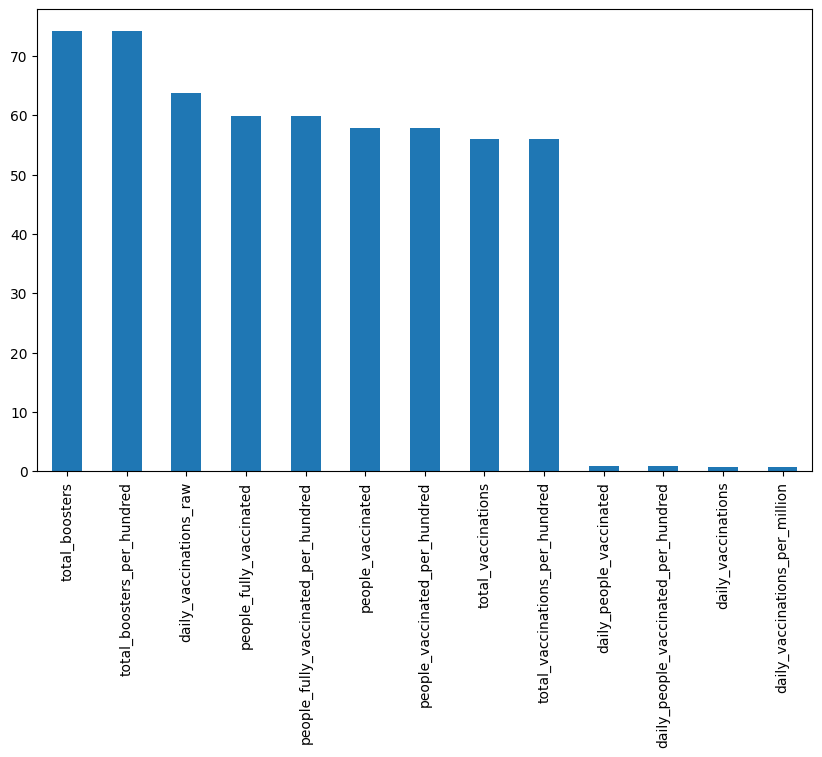

In [ ]:
# Graficamente
plt.figure(figsize=(10,6))
serie.plot(kind='bar')

**Análisis de nulos graficamente usando librería missingno**

<Axes: >

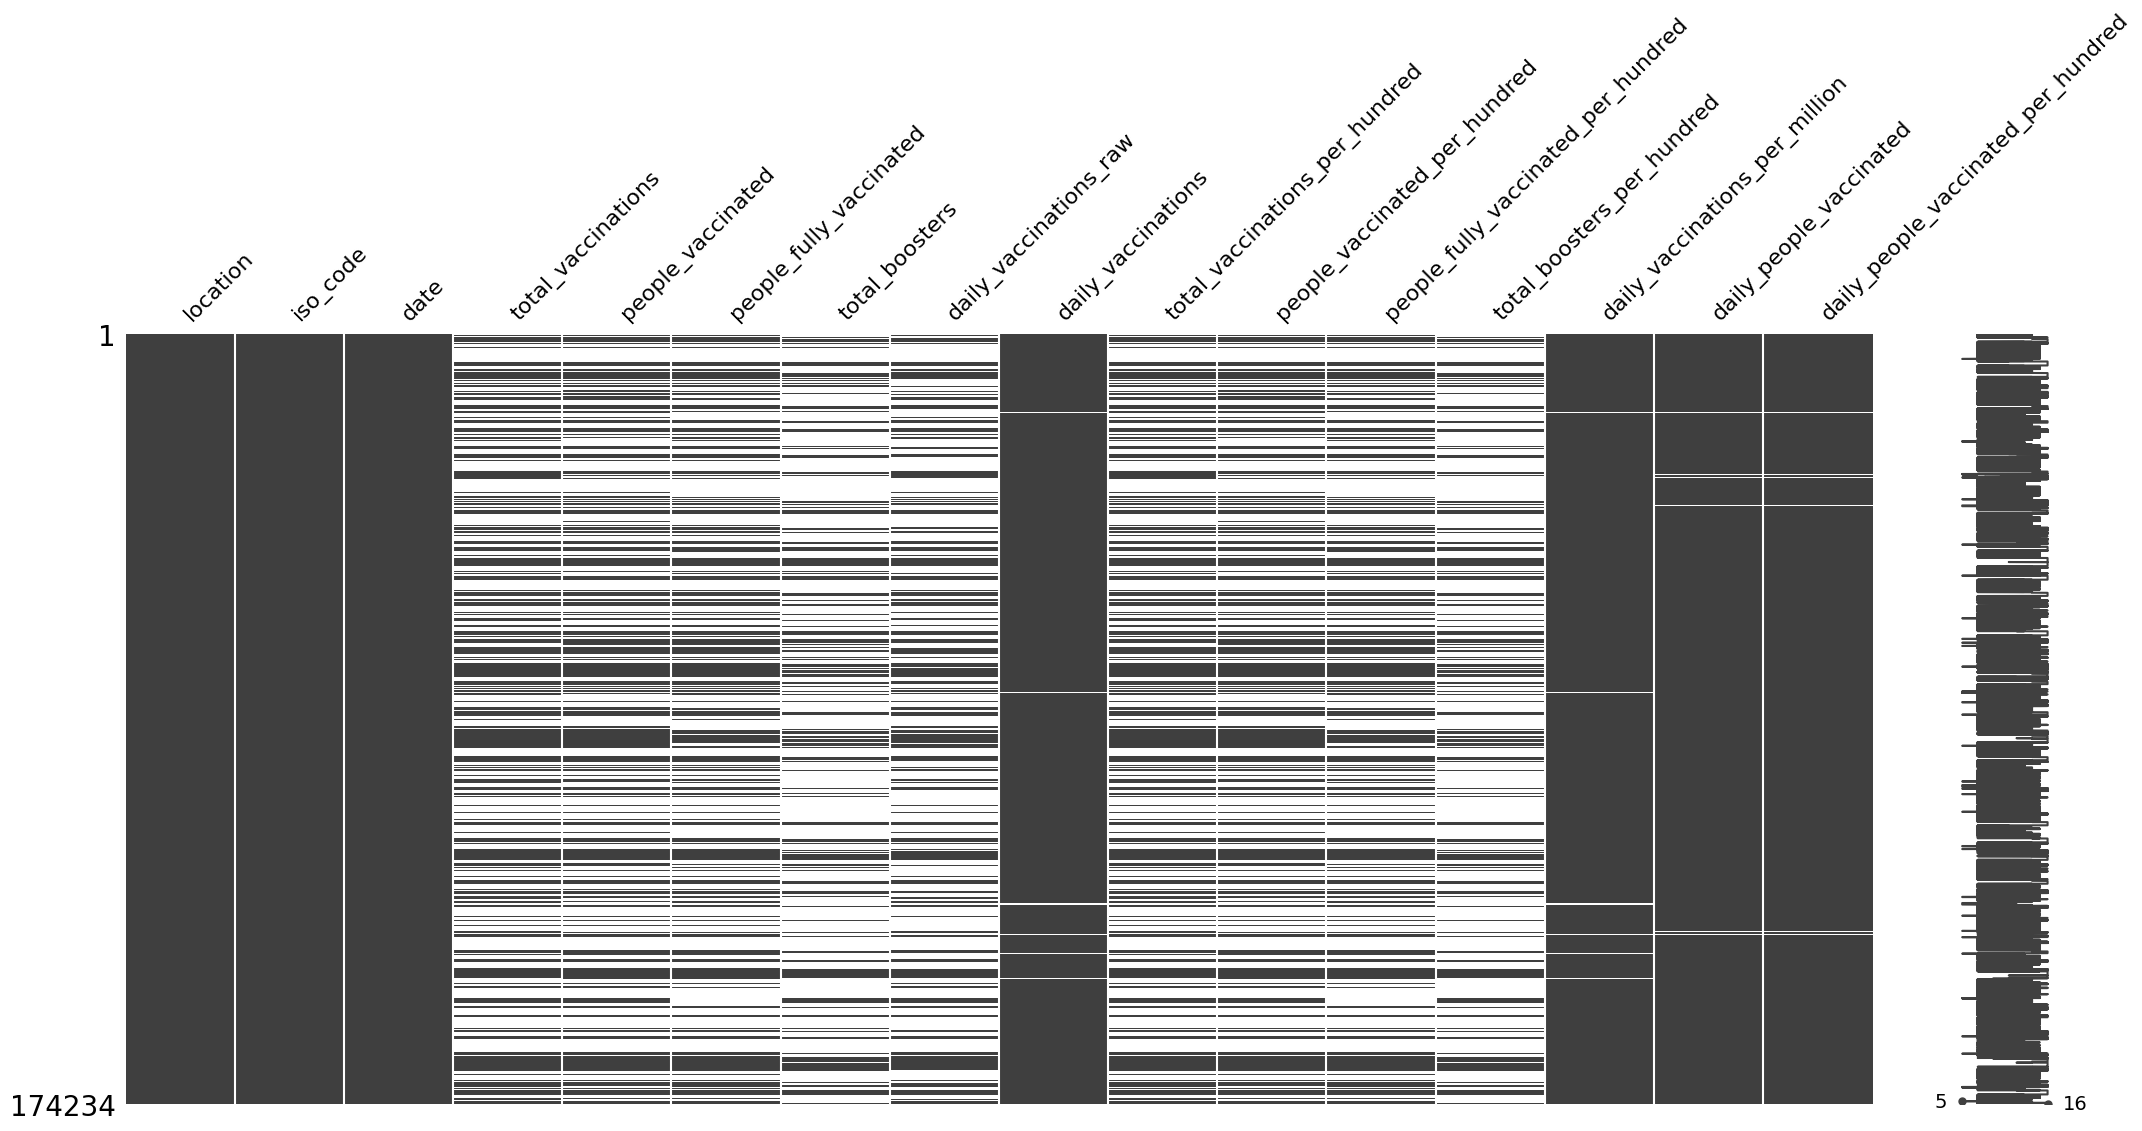

In [ ]:
msno.matrix(df_vacunation)

**Se analiza columna por columna de las que poseen nulos y se decide como avanzar**

In [ ]:
def nulos(columna):
  registros = len(columna)
  nulos = columna.isnull().sum()
  porcentaje = round(nulos * 100 / registros,3)
  print(f'Total de valores nulos en la columna: {nulos} ( {porcentaje}%)\n')

In [ ]:
df_vacunation.columns

Index(['location', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'daily_vaccinations_per_million', 'daily_people_vaccinated',
       'daily_people_vaccinated_per_hundred'],
      dtype='object')

Las columnas de interés para el proyecto son:

*   Location
*   date
*   total_vaccinations
*   people_vaccinated
*   daily_vaccinations_raw
*   daily_vaccinations
*   daily_people_vaccinated_per_hundred
*   iso_code



In [ ]:
nulos(df_vacunation['location'])

Total de valores nulos en la columna: 0 ( 0.0%)



Esta columna no posee valores nulos



In [ ]:
nulos(df_vacunation['date'])

Total de valores nulos en la columna: 0 ( 0.0%)



Esta columna no posee valores nulos

In [ ]:
nulos(df_vacunation['total_vaccinations'])

Total de valores nulos en la columna: 97646 ( 56.043%)



Esta columna posee valores nulos por lo que se debe proceder a realizar un tratamiento. Se cargan datos diariamente y hay dias que no hay vacunaciones y es por ello que no hay datos.

In [ ]:
nulos(df_vacunation['people_vaccinated'])

Total de valores nulos en la columna: 100893 ( 57.907%)



In [ ]:
nulos(df_vacunation['daily_vaccinations_raw'])

Total de valores nulos en la columna: 111192 ( 63.818%)



In [ ]:
nulos(df_vacunation['daily_vaccinations'])

Total de valores nulos en la columna: 1330 ( 0.763%)



In [ ]:
nulos(df_vacunation['daily_people_vaccinated_per_hundred'])

Total de valores nulos en la columna: 1539 ( 0.883%)



Finalmente, se conservarán las columnas de interés y en el caso de tener un porcentaje alto de valores nulos se procederá a realizar un tratamiento. En el caso de que la columna no sea de interés, se eliminará.

In [5]:
columnas_a_eliminar = [ 'people_fully_vaccinated', 'total_boosters',
                       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'daily_vaccinations_per_million', 'daily_people_vaccinated']
# Eliminar las columnas de la lista
df_vacunacion_limpio = df_vacunation.drop(columns=columnas_a_eliminar)
df_vacunacion_limpio.columns

Index(['location', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations',
       'daily_people_vaccinated_per_hundred'],
      dtype='object')

Para las columnas: total_vaccinations, people_vaccinated, daily_vaccinations_raw,  al poseer un porcentaje alto de nulos, se procede a analizarlas. Estos datos son cargados diariamente, y es por ello que hay dias en los que no hubieron vacunaciones y por lo tanto no trae ningun valor. Por ello se procede  a rellenar estas columnas donde no hay valores, por 0. (Porque se supone que esos dias no hay vacunaciones, si fuera diferente se podria interpolar)

###Manipulación de columnas - Llenado

In [6]:
columnas_a_rellenar= ['iso_code','total_vaccinations','people_vaccinated','daily_vaccinations_raw','daily_vaccinations','daily_people_vaccinated_per_hundred']

for i in columnas_a_rellenar: # reemplazar por 0
  df_vacunacion_limpio[columnas_a_rellenar] = df_vacunacion_limpio[columnas_a_rellenar].fillna(0)
# Verificar que funciono
for i in columnas_a_rellenar:
  print(f'Columna {i} con ', df_vacunacion_limpio[i].isnull().sum() , ' nulos.')

Columna iso_code con  0  nulos.
Columna total_vaccinations con  0  nulos.
Columna people_vaccinated con  0  nulos.
Columna daily_vaccinations_raw con  0  nulos.
Columna daily_vaccinations con  0  nulos.
Columna daily_people_vaccinated_per_hundred con  0  nulos.


Ahora el data set queda listo para unir con el dataset original de casos de Covid y asi se puede realizar el analisis de interes.

###Union de datasets

In [ ]:
df_vacunacion_limpio.columns

Index(['location', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'daily_vaccinations_raw', 'daily_vaccinations',
       'daily_people_vaccinated_per_hundred'],
      dtype='object')

In [ ]:
df_covid.columns

Index(['iso_code', 'Country', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

Debemos unir por el iso_code pero primero debemos realizar la sumatoria ya que se tienen varias filas por locacion en el caso de el dataset de la vacunación.

In [7]:
total_vaccinations_by_code = df_vacunacion_limpio.groupby('iso_code')['total_vaccinations'].sum()
df_total_vaccinations = pd.DataFrame({
    'iso_code': total_vaccinations_by_code.index,
    'total_vaccinations': total_vaccinations_by_code.values
})


In [ ]:
print(type(df_total_vaccinations))
print(type(df_covid))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [8]:
merged_df = df_total_vaccinations.merge(df_covid, on='iso_code')

In [9]:
merged_df.head()

,iso_code,total_vaccinations,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,AFG,1.105752e+09,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,ALB,3.891877e+08,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,AND,5.532126e+06,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
3,ARG,6.976560e+10,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
4,ARM,5.430384e+07,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe


Ahora si se puede visualizar, además de la cantidad de casos, muertes y recuperados, la cantidad de vacunados por país.

In [10]:
merged_df.columns

Index(['iso_code', 'total_vaccinations', 'Country', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered',
       'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [ ]:
merged_df.shape

(72, 17)

#Sección 5: Análisis exploratorio de datos

In [ ]:
x = merged_df['WHO Region']
y = merged_df['Deaths']

In [11]:
muertes_por_region = merged_df.groupby('WHO Region')['Deaths'].sum().reset_index()
muertes_ordenado=muertes_por_region.sort_values
# Muestra la tabla con la suma de muertes por región
print(muertes_ordenado)

<bound method DataFrame.sort_values of               WHO Region  Deaths
0                 Africa     992
1               Americas  181819
2  Eastern Mediterranean   15423
3                 Europe  109119
4        South-East Asia   38304
5        Western Pacific     167>


**¿Cuáles fueron las regiones en las cuales hubo más cantidad de muertes?**

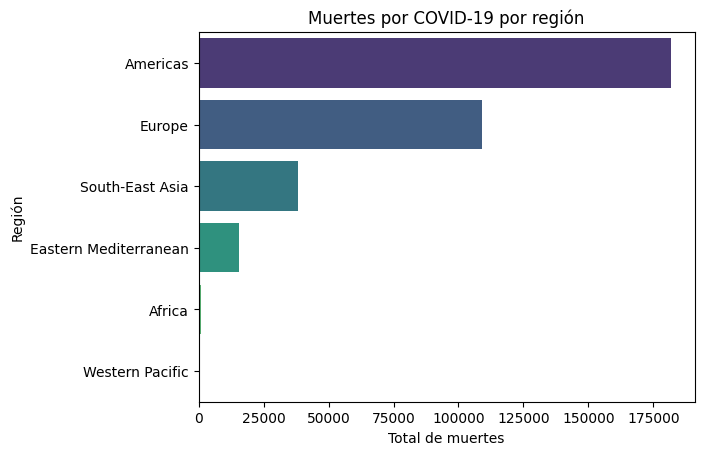

In [ ]:
# Ordenar los índices por el total de muertes en orden descendente
sorted_indexes = muertes_por_region['Deaths'].sort_values(ascending=False).index

sorted_x = muertes_por_region['WHO Region'][sorted_indexes]
sorted_y = muertes_por_region['Deaths'][sorted_indexes]

ax = sns.barplot(x=sorted_y, y=sorted_x, palette="viridis")
ax.set_title('Muertes por COVID-19 por región')
ax.set_xlabel('Total de muertes')
ax.set_ylabel('Región')
plt.show()


Se visualiza, que en las regiones donde más muertes hubieron fue america, europa y por ultimo el sudeste asiatico.

**Actualmente,sabemos que existen casos activos de Covid.¿Pero, cual es el top 5 de países que cuentan con esos casos activos?**

In [ ]:
x1=merged_df['Country']
y1=merged_df['Active']

In [ ]:
activos_pais = merged_df.groupby('Country')['Active'].sum().reset_index()
activos_pais = activos_pais.sort_values(by='Active', ascending=False)
activos_pais.head(10)

,Country,Active
13,Brazil,508116
34,India,495499
56,Russia,201097
15,Colombia,117163
28,France,108928
14,Canada,107514
53,Peru,98752
3,Argentina,91782
62,Sweden,73695
24,Egypt,52992


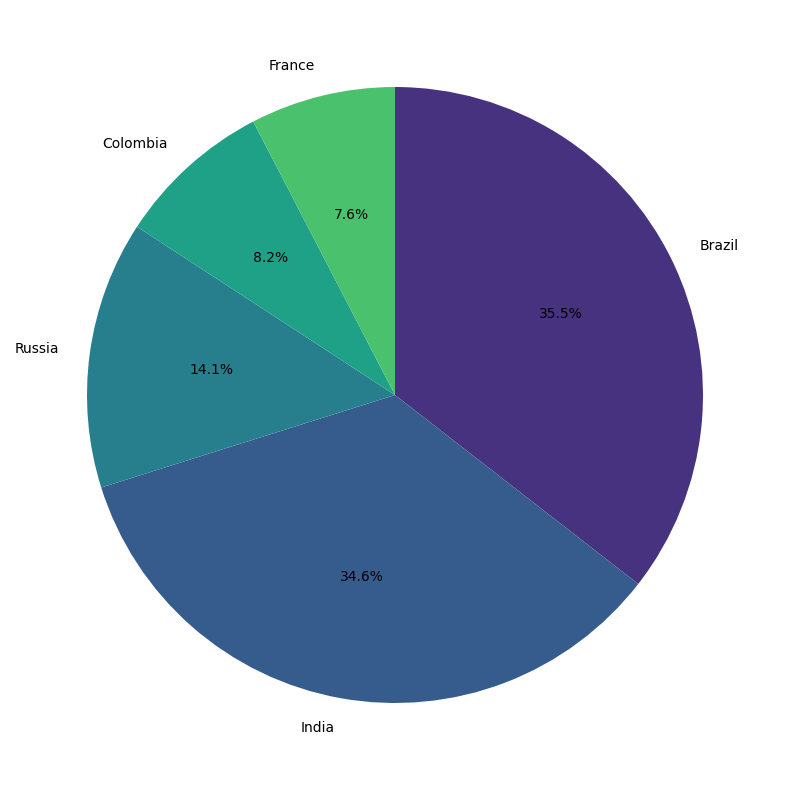

In [ ]:
top5_activos_pais = activos_pais.head(5)
sns.set_palette("viridis")
fig, ax = plt.subplots(figsize=(15, 10))

ax.pie(top5_activos_pais['Active'], labels=top5_activos_pais['Country'], autopct='%1.1f%%', startangle=90, counterclock=False)
# Obtener los índices ordenados por el total de casos activos en orden descendente
sorted_indexes = activos_pais.index

Gracias a la visualización obtenida, podemos decir que los países con la mayor cantidad de casos activos actualmente,son Brazil, India, Francia, Colombia, y  Rusia.

Es muy importante poder determinar, una comparativa entre la cantidad de personas que fallecieron y las que se recuperaron, ya que de esa forma podemos ver que tanto afecto el virus a la población en general. Es por lo que nos preguntamos:
**¿Cuál fue el porcentaje de muertes y de recuperados por region?**

In [ ]:
recuperados=merged_df['Recovered']
muertes=merged_df['Deaths']
region=merged_df['WHO Region']

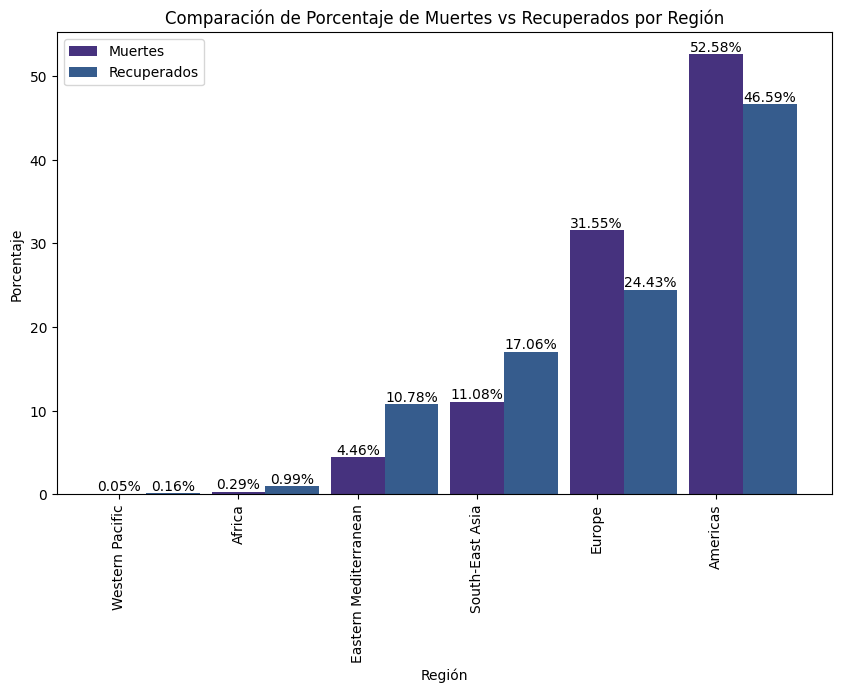

In [ ]:
#DataFrame con las columnas de región, muertes y recuperados
df = pd.DataFrame({'Región': region, 'Muertes': muertes, 'Recuperados': recuperados})

df_grouped = df.groupby('Región').sum().reset_index() #Agrupo por región y sumo  muertes y recuperados

#Para ordenar los valores por cantidad
df_grouped=df_grouped.sort_values('Muertes',ascending=True)
df_grouped=df_grouped.sort_values('Recuperados',ascending=True)

#porcentajes de muertes y recuperados
total_muertes = df_grouped['Muertes'].sum()
total_recuperados = df_grouped['Recuperados'].sum()
df_grouped['Porcentaje Muertes'] = (df_grouped['Muertes'] / total_muertes) * 100
df_grouped['Porcentaje Recuperados'] = (df_grouped['Recuperados'] / total_recuperados) * 100

#gráfico
fig, ax = plt.subplots(figsize=(10, 6))
posiciones = range(len(df_grouped))
ancho_barras = 0.45

barras_muertes = ax.bar(posiciones, df_grouped['Porcentaje Muertes'], width=ancho_barras, label='Muertes')
barras_recuperados = ax.bar([p + ancho_barras for p in posiciones], df_grouped['Porcentaje Recuperados'], width=ancho_barras, label='Recuperados')

#Estilos de gráfico
ax.set_xticks(posiciones)
ax.set_xticklabels(df_grouped['Región'], rotation=90)
ax.legend()
ax.set_title('Comparación de Porcentaje de Muertes vs Recuperados por Región')
ax.set_xlabel('Región')
ax.set_ylabel('Porcentaje')

# Agregar etiquetas a las barras
for barra in barras_muertes + barras_recuperados:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width() / 2, altura, f'{altura:.2f}%', ha='center', va='bottom')

Gracias al grafico que compara el porcentaje de muertes vs porcentaje de recuperados, podemos sacar ciertas conclusiones, por ejemplo, si bien en America hubo un porcentaje alto de muertes, podemos visualizar que a su vez, tiene un porcentaje casi identico al de recuperados. Quizas para hacerlo mas representativo, se podria comparar en función de la cantidad de casos que hubieron, asi se obtendria del total de casos, que porcentaje murio y que porcentaje se recupero.

**Como se mencionó anteriormente, sería interesante poder visualizar según la cantidad de casos totales, cuantos casos hay activos, cuantos se recuperaron y cuantos murieron?**

In [ ]:
recuperados = merged_df['Recovered']
muertes = merged_df['Deaths']
activos =merged_df['Active']
region = merged_df['WHO Region']
confirmados=merged_df['Confirmed']

In [ ]:
#DataFrame con las columnas de región y muertes
df = pd.DataFrame({'Región': region, 'Active': activos, 'Muertes': muertes,'Recuperados': recuperados,'Confirmed': confirmados})

# Agrupar por región y sumar las muertes
df_grouped = df.groupby('Región').sum().reset_index()
df_grouped

,Región,Active,Muertes,Recuperados,Confirmed
0,Africa,32177,992,58605,91774
1,Americas,1124363,181819,2765064,4071246
2,Eastern Mediterranean,139516,15423,639877,794816
3,Europe,596125,109119,1450033,2155277
4,South-East Asia,532919,38304,1012450,1583673
5,Western Pacific,5826,167,9330,15323


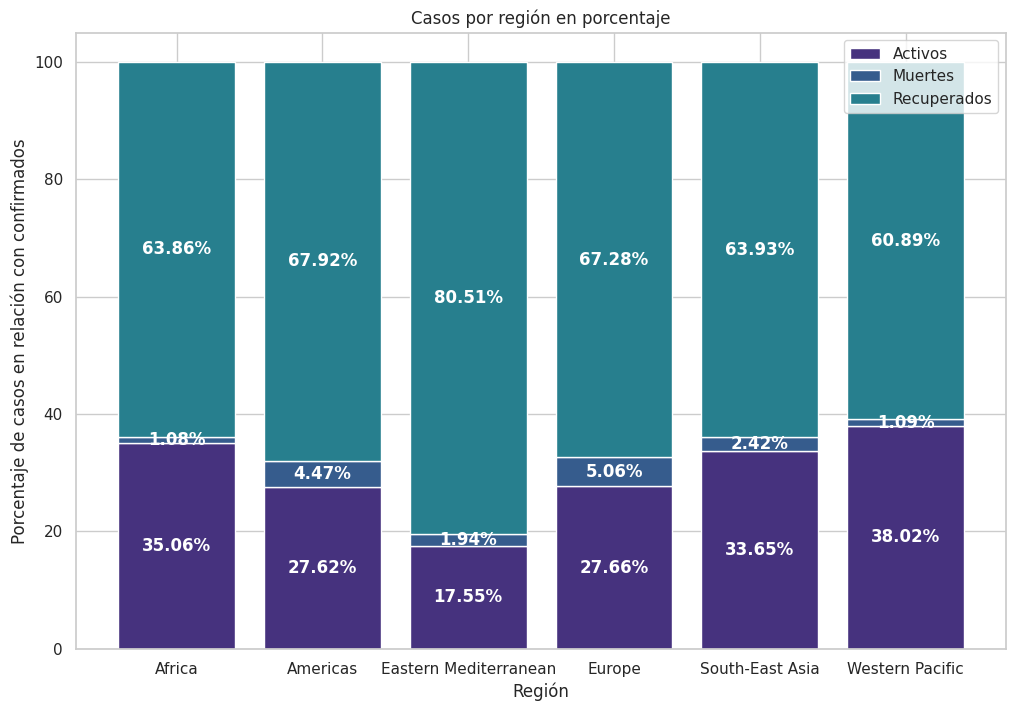

In [ ]:
#Porcentajes
df_grouped['Porcentaje_Activos'] = (df_grouped['Active'] / df_grouped['Confirmed']) * 100
df_grouped['Porcentaje_Muertes'] = (df_grouped['Muertes'] / df_grouped['Confirmed']) * 100
df_grouped['Porcentaje_Recuperados'] = (df_grouped['Recuperados'] / df_grouped['Confirmed']) * 100

sns.set(style="whitegrid", palette="viridis")
plt.figure(figsize=(12, 8))
plt.bar(df_grouped['Región'], df_grouped['Porcentaje_Activos'], label='Activos', color=sns.color_palette()[0])
plt.bar(df_grouped['Región'], df_grouped['Porcentaje_Muertes'], label='Muertes', color=sns.color_palette()[1], bottom=df_grouped['Porcentaje_Activos'])
plt.bar(df_grouped['Región'], df_grouped['Porcentaje_Recuperados'], label='Recuperados', color=sns.color_palette()[2], bottom=df_grouped['Porcentaje_Activos'] + df_grouped['Porcentaje_Muertes'])
plt.xlabel('Región')
plt.ylabel('Porcentaje de casos en relación con confirmados')
plt.title('Casos por región en porcentaje')
plt.legend()

# Mostrar etiquetas de datos
for i, v in enumerate(df_grouped['Porcentaje_Activos']):
    plt.text(i, v/2, f'{v:.2f}%', ha='center', va='center', color='white', fontweight='bold')

for i, v in enumerate(df_grouped['Porcentaje_Muertes']):
    plt.text(i, df_grouped['Porcentaje_Activos'][i] + v/2, f'{v:.2f}%', ha='center', va='center', color='white', fontweight='bold')

for i, v in enumerate(df_grouped['Porcentaje_Recuperados']):
    plt.text(i, df_grouped['Porcentaje_Activos'][i] + df_grouped['Porcentaje_Muertes'][i] + v/2, f'{v:.2f}%', ha='center', va='center', color='white', fontweight='bold')

plt.show()



Gracias a la siguiente visualizacion, se puede observar que si bien existe una gran cantidad de casos activos, en su mayoria, se recuperan. Existe un procentaje pequeño de muertes , teniendo en cuenta la cantidad de casos confirmados.  Además gracias a este grafico, pueden surgir otras consultas tales como, por que existen regiones que tienen una tasa de mortalidad mas alta que respecto a otras? que factores estan influyendo? (En el caso de este trabajo no se cuentan con los informacion necesaria para seguir con este analisis, pero es bueno tener en cuenta a donde puede seguir llevandose el analisis)

**¿Cuántos casos confirmados hay por región?**

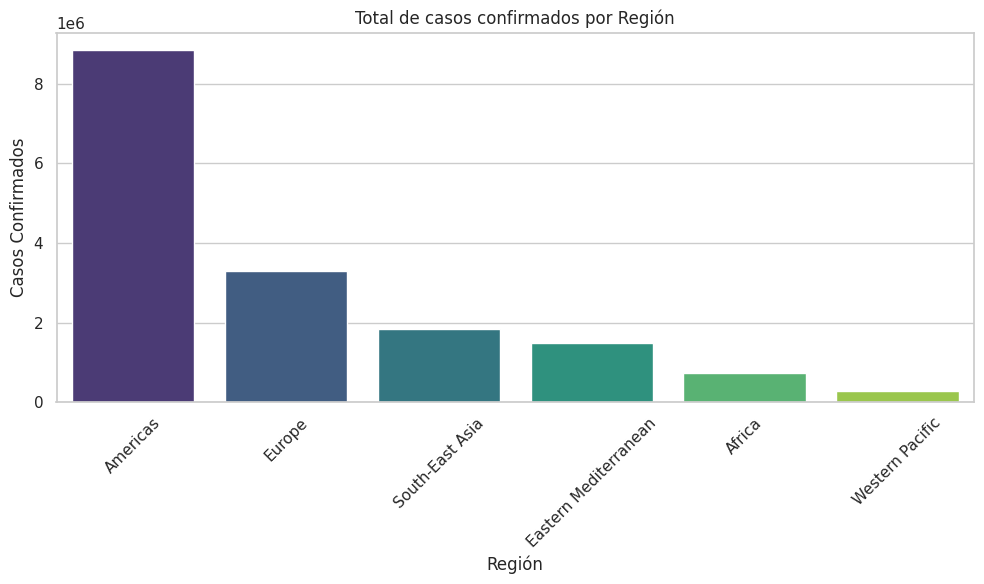

In [ ]:
casos=df_covid['Confirmed']
region=df_covid['WHO Region']

df_grouped = pd.DataFrame({'WHO Region': region, 'Confirmed': casos})

# Agrupar por región y sumar los casos confirmados y recuperados
df_grouped = df_grouped.groupby('WHO Region').sum().reset_index()

# DataFrame por casos confirmados en orden descendente
df_grouped = df_grouped.sort_values('Confirmed', ascending=False)

sns.set(style="whitegrid", palette="viridis")
plt.figure(figsize=(10, 6))

sns.barplot(data=df_grouped, x='WHO Region', y='Confirmed')
plt.xlabel('Región')
plt.ylabel('Casos Confirmados')
plt.title('Total de casos confirmados por Región')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La idea de este gráfico, es poder ver la cantidad de casos confirmados de Covid-19 según la región del mundo. Como se puede observar, la region que contiene la mayor cantidad de casos confirmados de covid es America, seguido por Europa.





**¿Cuál el top 5 de países con mayor cantidad de vacunados?**

In [ ]:
country=merged_df['Country']
total_vaccinations=merged_df['total_vaccinations']

In [ ]:
vacunados_pais = merged_df.groupby('Country')['total_vaccinations'].sum().reset_index()
vacunados_pais = vacunados_pais.sort_values(by='total_vaccinations', ascending=False)
vacunados_pais.head(5)

,Country,total_vaccinations
34,India,1.278697e+12
35,Indonesia,1.278697e+12
13,Brazil,2.019023e+11
28,France,1.007896e+11
37,Italy,9.508283e+10


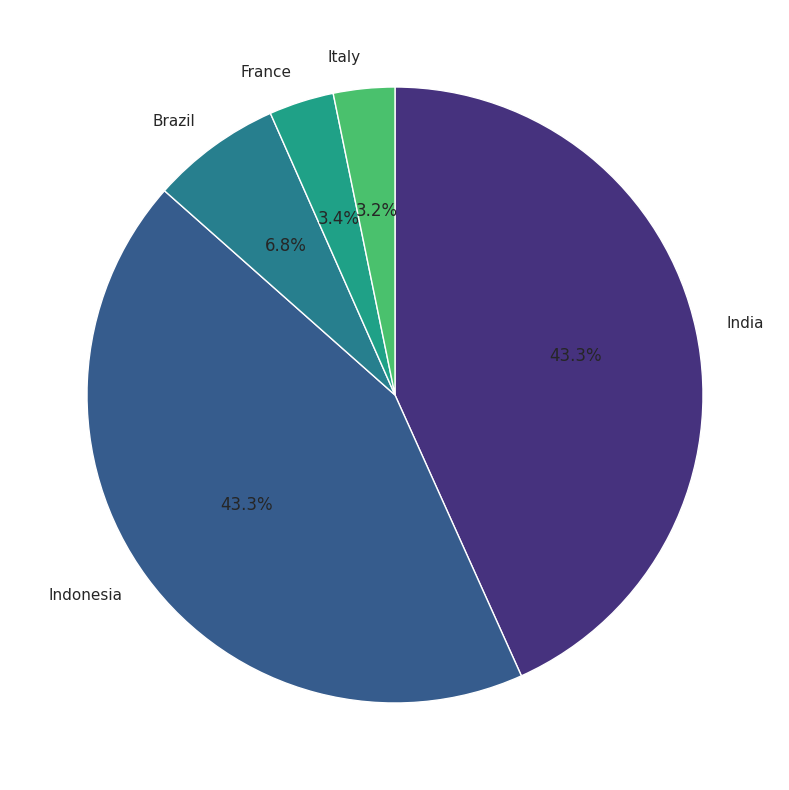

In [ ]:
top5_vac_pais = vacunados_pais.head(5)
sns.set_palette("viridis")
fig, ax = plt.subplots(figsize=(15, 10))

ax.pie(top5_vac_pais['total_vaccinations'], labels=top5_vac_pais['Country'], autopct='%1.1f%%', startangle=90, counterclock=False)
# Obtener los índices ordenados por el total de casos activos en orden descendente
sorted_indexes =  vacunados_pais.index

Podemos observar que Indonesia e India son los paises con mayor cantidad de vacunados. Sin embargo India, es uno de los paises con mayor cantidad de casos activos de covid, lo que nos puede decir que aunque existan gran cantidad de vacunados, no quita que se tengan casos

#Sección 6: Machine learning

###Análisis de correlación entre variables

<ipython-input-106-a3f44c60e706>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion= merged_df.corr().round(1)


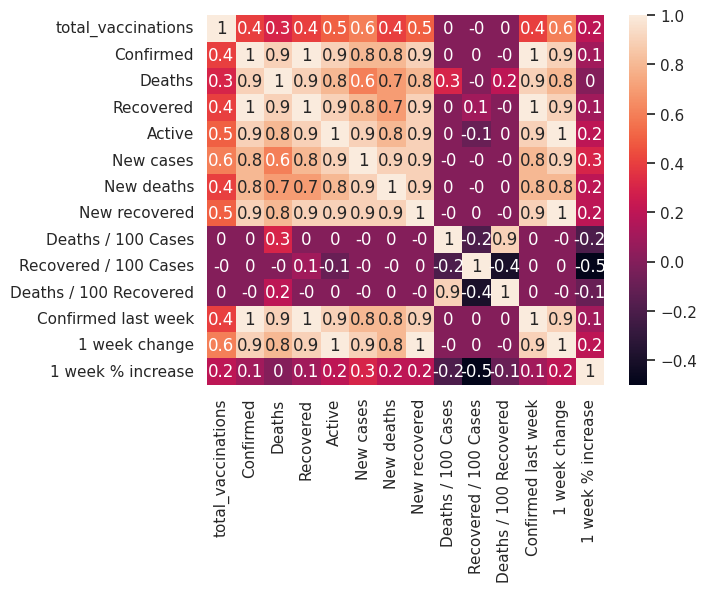

In [ ]:
matriz_correlacion= merged_df.corr().round(1)
sns.heatmap(data=matriz_correlacion, annot=True)
plt.show()

INSIGTHS: existe una alta correlación 0,9 entre confirmados y recuperados Además si tenemos en cuenta la relación existente entre los nuevos casos y el total de vacunados. Sin embargo, no solo existen correlaciones fuertes entre estas variables si no que hay aun más, tales como la relación entre los nuevos casos y los cambios de una semana ('1 week change')

#Modelo
Se utilizarán modelos de regresión y arboles de decisión para intentar predecir la cantidad de nuevos casos, segun las variables con las que más correlacion se encuentre.

Primero se llevará a cabo un feature engineering, luego una selección de esas variables con las que mas correlación encuentre y luego se procederá a ejecutar el modelo.

##  1.Feature Engineering

In [12]:
data_covid = merged_df.copy()
print('\nCOLUMNAS Y TIPO DE DATOS DE COLUMNAS\n')
data_covid.info()


COLUMNAS Y TIPO DE DATOS DE COLUMNAS

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   iso_code                72 non-null     object 
 1   total_vaccinations      72 non-null     float64
 2   Country                 72 non-null     object 
 3   Confirmed               72 non-null     int64  
 4   Deaths                  72 non-null     int64  
 5   Recovered               72 non-null     int64  
 6   Active                  72 non-null     int64  
 7   New cases               72 non-null     int64  
 8   New deaths              72 non-null     int64  
 9   New recovered           72 non-null     int64  
 10  Deaths / 100 Cases      72 non-null     float64
 11  Recovered / 100 Cases   72 non-null     float64
 12  Deaths / 100 Recovered  72 non-null     float64
 13  Confirmed last week     72 non-null     int64  
 14  1 wee

***Procedemos a realizar Label Encoding para la variable WHO Region***

In [13]:
label_encoder = LabelEncoder()
data_covid['WHO Region'] = label_encoder.fit_transform(data_covid['WHO Region'])

In [14]:
data_covid = data_covid.drop(['Country','iso_code'], axis = 1)


## Feature selection

Primero debemos determinar el conjunto de datos x sin incluir la variable target, y esa sera y. En nuestro caso, nuestra variable a predecir es la cantidad de nuevos casos = New cases

Elimino todos aquellos valores NAN o inf ya que si no no se puede aplicar el metod

In [15]:
# Reemplazar valores infinitos con NaN en todo el DataFrame
data_covid.replace([np.inf, -np.inf], np.nan, inplace=True)

# Eliminar filas con valores nulos en todo el DataFrame
data_covid.dropna(inplace=True)

In [16]:
def forward_selection(data, target, significancia):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significancia):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [17]:
x=data_covid.drop('New cases',axis=1)
y=data_covid['New cases']

In [18]:
significancia = 0.10
seleccionadas = forward_selection(x,y,significancia)
print(f"\nCon nivel {significancia} se han seleccionado {len(seleccionadas)} características: ",seleccionadas, '\n')

<ipython-input-16-edcd23424107>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-16-edcd23424107>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-16-edcd23424107>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-16-edcd23424107>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



Con nivel 0.1 se han seleccionado 7 características:  ['New recovered', 'Recovered', 'Active', 'New deaths', 'Confirmed last week', 'Recovered / 100 Cases', 'total_vaccinations'] 



<ipython-input-16-edcd23424107>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-16-edcd23424107>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-16-edcd23424107>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-16-edcd23424107>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Las columnas seleccionadas son:  

*   New recovered
*   Recovered
*   Active
*   New deaths
*   Confirmed last week
*   Recovered / 100 Cases
*   total_vaccinations



**`Analisis bivariado`**

---




**Gráfico de dispersión entre variable confirmados la ultima semana y nuevos casos**

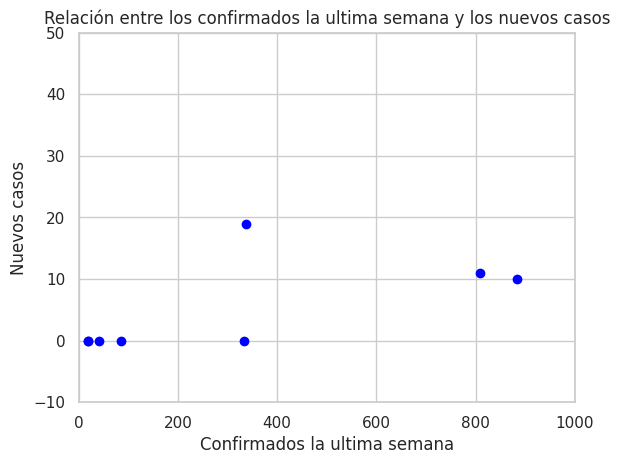

In [ ]:
plt.scatter(data_covid['Confirmed last week'], data_covid['New cases'],color='b')
plt.xlabel('Confirmados la ultima semana')
plt.ylabel('Nuevos casos')
plt.title('Relación entre los confirmados la ultima semana y los nuevos casos')
plt.ylim(-10, 50); plt.xlim(0, 1000)
plt.show()

No se encuentra algun comportamiento marcado, o tendencia, solamente se puede observar un comportamiento lineal (levemente)

**Gráfico de dispersión entre variable activos y nuevos casos**


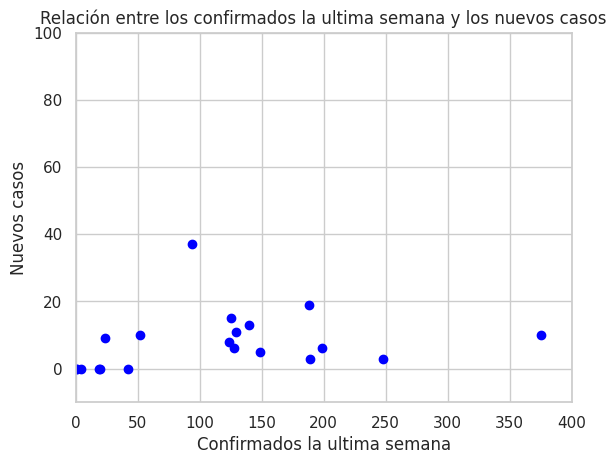

In [ ]:
plt.scatter(data_covid['Active'], data_covid['New cases'],color='b')
plt.xlabel('Confirmados la ultima semana')
plt.ylabel('Nuevos casos')
plt.title('Relación entre los confirmados la ultima semana y los nuevos casos')
plt.ylim(-10, 100); plt.xlim(0, 400)
plt.show()

No se encuentra algun comportamiento marcado, o tendencia, solamente se puede observar un comportamiento lineal (levemente)

Al no encontrarse ningun comportamiento marcado o alcista analizando las variables una por una versus la variable target (solamente un leve comportamiento lineal), procedemos a realizar una regresión multiple ya que quiza teniendo en cuenta todas las variables si se tenga algun comportamiento más marcado.

## 2.Regresión lineal multiple

In [19]:
# 1 )Preparación de datos
X = data_covid[['New recovered', 'Recovered', 'Active', 'New deaths', 'Confirmed last week', 'Recovered / 100 Cases','total_vaccinations']]
y = data_covid['New cases']

In [20]:
# 2) Separacion en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#Entrenamiento del modelo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
# New recovered', 'Recovered', 'Active', 'New deaths', 'Confirmed last week', 'Recovered / 100 Cases,'total_vaccinations'
regressor.coef_

array([ 1.68406749e-01,  3.17566157e-02,  9.34732188e-02,  1.80512976e+01,
       -4.60538403e-02,  2.29091749e+01,  1.27356748e-09])

In [ ]:
X.columns

Index(['New recovered', 'Recovered', 'Active', 'New deaths',
       'Confirmed last week', 'Recovered / 100 Cases', 'total_vaccinations'],
      dtype='object')

In [24]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
New recovered,1.684067e-01
Recovered,3.175662e-02
Active,9.347322e-02
New deaths,1.805130e+01
Confirmed last week,-4.605384e-02
Recovered / 100 Cases,2.290917e+01
total_vaccinations,1.273567e-09


In [25]:
#Realizando las predicciones
y_pred = regressor.predict(X_test)
y_pred

array([ 114.57596484,  567.6805493 ,  386.34550122,  348.36820878,
         51.92436497,  617.69017807, -398.57488839,  257.79157565,
        264.61475607, 2617.40373569,   42.30993094,  354.01366298,
        -31.43999377,  297.44179154])

In [26]:
y_test

48       0
17      37
4       73
9      402
29     205
42       0
60      18
5      368
65       3
12    1752
26     579
69     678
49     127
0      106
Name: New cases, dtype: int64

Para comparar los valores de salida reales X_test con los valores predichos, convertimos en df:

In [27]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df['Sesgo']=df.Actual -df.Predicted
df['Error_porc']=((df.Actual -df.Predicted)/df.Actual) *100
df

,Actual,Predicted,Sesgo,Error_porc
48,0,114.575965,-114.575965,-inf
17,37,567.680549,-530.680549,-1434.271755
4,73,386.345501,-313.345501,-429.240413
9,402,348.368209,53.631791,13.341242
29,205,51.924365,153.075635,74.671041
42,0,617.690178,-617.690178,-inf
60,18,-398.574888,416.574888,2314.304936
5,368,257.791576,110.208424,29.947941
65,3,264.614756,-261.614756,-8720.491869
12,1752,2617.403736,-865.403736,-49.395190


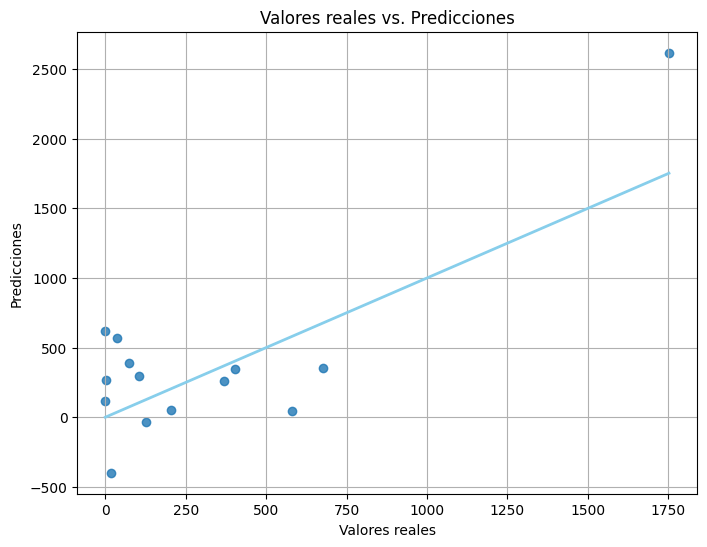

In [28]:
# Crear una figura y ejes para el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.8)
plt.title('Valores reales vs. Predicciones')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.grid(True)

#Agregar linea de tendencia
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='skyblue', linewidth=2)
plt.show()


In [29]:
print('Valor de la intersección')
print(regressor.intercept_.round(2))
print('Precisión de mi modelo')
print(regressor.score(X_test,y_test).round(2))

Valor de la intersección
-1559.23
Precisión de mi modelo
0.22


##Conclusión de la regresión múltiple

En resumen, un R² de 0.22 indica que hay margen de mejora en el modelo de regresión. Es importante seguir explorando y ajustando el modelo para obtener un mejor rendimiento en la predicción de "New cases".
Un valor de R² igual a 0.22 significa que el modelo de regresión lineal no explica una gran parte de la variabilidad en la variable objetivo ("New cases").

## 3.Random Forest

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Crea una instancia del modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrena el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [32]:
y_pred = rf_model.predict(X_test)

In [33]:
r2 = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinación (R²): {r2}")

Coeficiente de Determinación (R²): 0.621143854509718


**Graficamente valores reales vs predicciones**

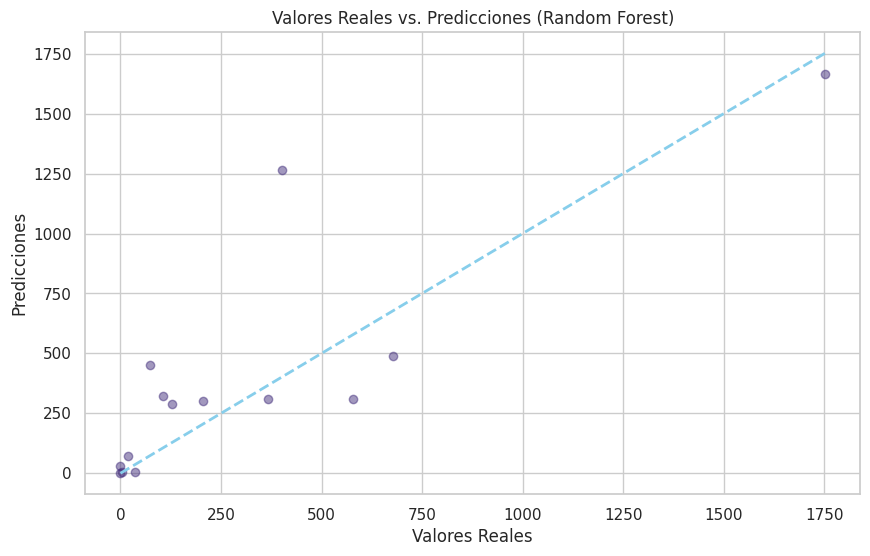

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Valores Reales vs. Predicciones (Random Forest)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='skyblue', linewidth=2)
plt.show()


##Conclusión Random Forest

Un R² de 0.62 sugiere que el modelo de Random Forest es capaz de explicar aproximadamente el 62% de la variabilidad en la variable objetivo (en comparación con solo el 12% explicado por la regresión lineal múltiple). Esto indica que el modelo de Random Forest tiene un mejor ajuste a los datos y es más capaz de hacer predicciones precisas en comparación con el modelo de regresión lineal múltiple.

En la mayoría de los casos, un modelo de Random Forest tiene la ventaja de ser más flexible y capaz de capturar relaciones no lineales y complejas en los datos, lo que puede conducir a un mejor rendimiento predictivo en comparación con un modelo de regresión lineal múltiple.

###Optimizando hiperparámetros

####Grid Search


In [34]:
#Hypertuning utilizando grid search

random_forest = RandomForestRegressor() #Instanciamos el modelo

In [35]:
#parámetros de búsqueda
params = {
    'n_estimators' : [50,100,200],
    'max_features': [2,4,5],
    'criterion': ['squared_error', 'mse', 'absolute_error', 'poisson'],
    'max_depth':[4,5]
}

grid_random_forest = GridSearchCV(estimator = random_forest,
                                  param_grid = params,
                                  scoring = 'neg_mean_absolute_error',  #
                                  cv = 5,
                                  verbose = 1, #Muestra el resultado en pantalla
                                  n_jobs = -1) # corrida en paralelo

In [36]:
%%time
#Entrenamos el modelo
grid_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: user 866 ms, sys: 134 ms, total: 999 ms
Wall time: 45.4 s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'poisson'],
                         'max_depth': [4, 5], 'max_features': [2, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_error', verbose=1)

In [37]:
#Obtenemos el mejor modelo!
grid_random_forest.best_estimator_

RandomForestRegressor(criterion='poisson', max_depth=4, max_features=5,
                      n_estimators=50)

In [38]:
grid_random_forest.best_params_

{'criterion': 'poisson', 'max_depth': 4, 'max_features': 5, 'n_estimators': 50}

In [39]:
random_forest_nuevo = RandomForestRegressor(criterion='poisson',max_depth=4, max_features= 5, n_estimators=50) #Instanciamos el modelo

In [40]:
random_forest_nuevo.fit(X_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=4, max_features=5,
                      n_estimators=50)

In [41]:
#Predicción de casos nuevos
y_pred_train=random_forest_nuevo.predict(X_train)
y_pred_test = random_forest_nuevo.predict(X_test)

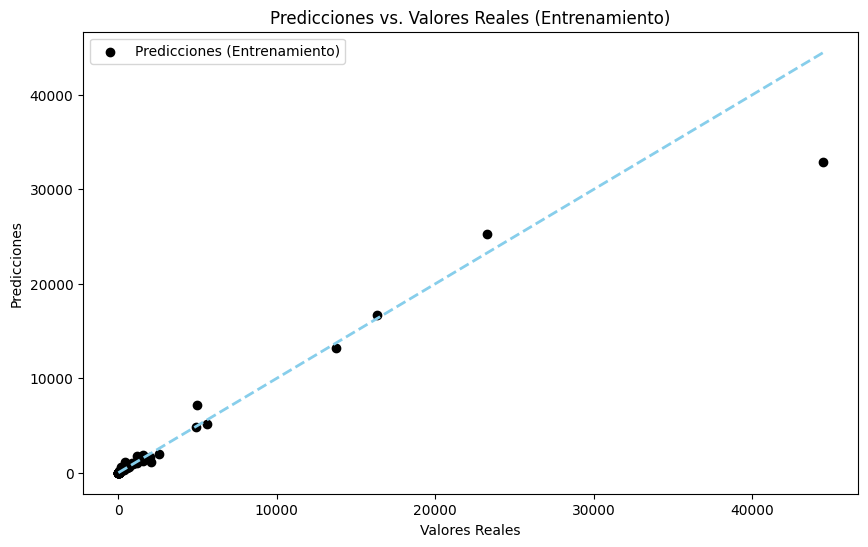

In [42]:
# Gráfica de valores predichos vs. valores reales en el conjunto de entrenamiento
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='black', label='Predicciones (Entrenamiento)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='skyblue', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (Entrenamiento)')
plt.legend()
plt.show()

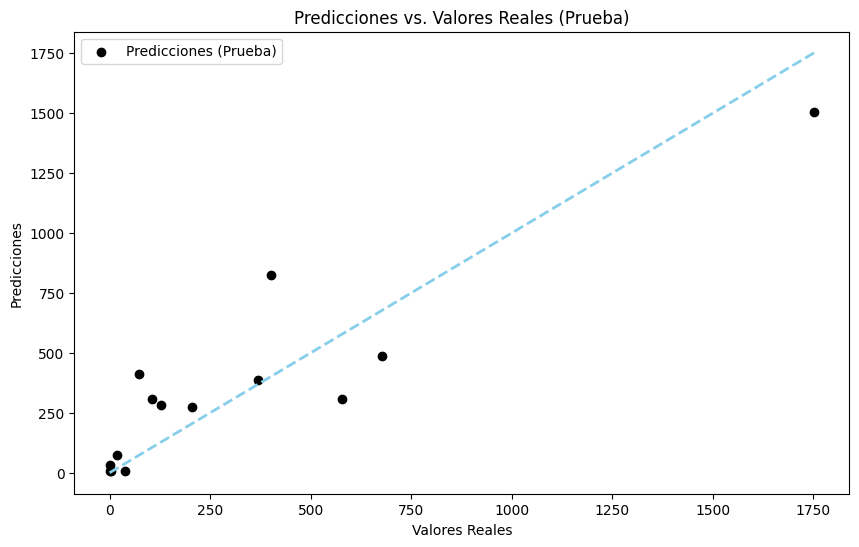

In [43]:
# Gráfica de valores predichos vs. valores reales en el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='black', label='Predicciones (Prueba)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='skyblue', linewidth=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (Prueba)')
plt.legend()
plt.show()

In [44]:
# Calcula el R^2
r2_test = r2_score(y_test, y_pred_test)
print(f'R^2 en el conjunto de prueba: {r2_test:.2f}')

R^2 en el conjunto de prueba: 0.81


Un valor de R^2 del 81% significa que el modelo es capaz de explicar aproximadamente el 81% de la variabilidad en los datos de la variable objetivo.

Podemos ver como luego del ajuste de los hiperparámetros, obtenemos un r2 más alto.

In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) # MAE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) # MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # RMSE

Mean Absolute Error: 174.02571428571426
Mean Squared Error: 78139.44340000002
Root Mean Squared Error: 279.53433313280146


Se concluye que optimizando parametros mediante grid search, obtenemos un modelo con un error promedio de 174 casos.  

####Randomized Search CV

In [46]:
#Hypertuning utilizando Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

random_forest = RandomForestRegressor()

# Define el espacio de búsqueda de hiperparámetros
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_features': [2, 4, 5],
    'max_depth': [4, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'absolute_error', 'poisson']
}


# Realiza Randomized Search CV
random_search = RandomizedSearchCV(random_forest, param_distributions=param_dist, n_iter=10, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1, random_state=42)

# Ajusta el modelo a los datos
random_search.fit(X, y)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Muestra el mejor puntaje (MAE) encontrado
print("Mejor puntaje (MAE) encontrado:", -random_search.best_score_)



Mejores hiperparámetros encontrados:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 4, 'max_depth': 5, 'criterion': 'poisson'}
Mejor puntaje (MAE) encontrado: 993.5068741640276


(Vemos que la optimización utilizando grid search obtiene mejores valores de MAE).

Un valor más bajo de MAE (Error Medio Absoluto) es mejor, ya que indica que el modelo tiene un mejor rendimiento en términos de la diferencia absoluta promedio entre las predicciones y los valores reales.

##4.Validación del modelo

**Stratified- K fold**

Utilizo K-Fold Para ver si no estan produciendo errores por la selección aleatoria de los datos de test

In [59]:
#Preparación de datos
X = data_covid[['New recovered', 'Recovered', 'Active', 'New deaths', 'Confirmed last week', 'Recovered / 100 Cases','total_vaccinations']]
y = data_covid['New cases']
#Separacion en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.model_selection import cross_val_score
# crear el modelo
model = RandomForestRegressor(criterion='poisson',max_depth=5, max_features= 4, n_estimators=50)
scores = cross_val_score(model, X, y, cv=7, verbose=1,scoring='r2')


In [61]:
print("%0.2f de r2 promedio con una desviacion estandar de %0.2f" % (scores.mean(), scores.std()))

0.51 de r2 promedio con una desviacion estandar de 0.41


**Aplicamos un segundo algoritmo X-boost**

In [63]:
# Modelo base
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',n_estimators = 100, seed = 42, max_depth=10, eta=0.01,
                        subsample=0.7, colsample_bytree=0.8)
# Ajustar rl modelo
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.01, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [65]:
y_pred=xgb_r.predict(X_test)
y_pred

array([ 997.29285,  997.29285, 1086.9131 , 1683.3082 , 1101.5127 ,
        997.29285,  997.29285, 1109.4434 ,  997.29285, 1957.8573 ,
       1067.365  , 1110.7603 , 1102.7688 ,  997.29285], dtype=float32)

In [66]:
y_test

48       0
17      37
4       73
9      402
29     205
42       0
60      18
5      368
65       3
12    1752
26     579
69     678
49     127
0      106
Name: New cases, dtype: int64

In [67]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 es:',r2)

MAE 846.834699358259
MSE 792636.54600209
RMSE 890.3013793104501
R2 es: 0.621143854509718


El modelo que mejor r2 obtuvo fue el de random forest, por lo que se elige trabajar con el mismo.